In [ ]:
pip install scipy


In [2]:
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
#This algorithm is meant for Position trading

In [3]:
stock_tickers = [
    "AAPL",      # Apple Inc.
    "MSFT",      # Microsoft Corporation
    "JNJ",       # Johnson & Johnson
    "XOM",       # Exxon Mobil Corporation
    "BA",        # Boeing Company
    "V",         # Visa Inc.
    "PG",        # Procter & Gamble Company
    "JPM",       # JPMorgan Chase & Co.
    "GS",        # Goldman Sachs Group, Inc.
    "INTC",      # Intel Corporation
    "T",         # AT&T Inc.
    "MMM",       # 3M Company
    "CSCO",      # Cisco Systems, Inc.
    "GE",        # General Electric Company
    "IBM",       # International Business Machines Corporation
    "CVX",       # Chevron Corporation
    "KO",        # Coca-Cola Company
    "HD",        # Home Depot, Inc.
    "DIS",       # Walt Disney Company
    "MCD",       # McDonald's Corporation
    "NKE",       # NIKE, Inc.
    "WMT",       # Walmart Inc.
    "PEP",       # PepsiCo, Inc.
    "ORCL",      # Oracle Corporation
    "CMCSA",     # Comcast Corporation
    "SLB",       # Schlumberger Limited
    "AMGN",      # Amgen Inc.
    "BAC",       # Bank of America Corporation
    "UNH",       # UnitedHealth Group Incorporated
    "MO",        # Altria Group, Inc.
]
stock_names = [
    "Apple Inc.",
    "Microsoft Corporation",
    "Johnson & Johnson",
    "Exxon Mobil Corporation",
    "Boeing Company",
    "Visa Inc.",
    "Procter & Gamble Company",
    "JPMorgan Chase & Co.",
    "Goldman Sachs Group, Inc.",
    "Intel Corporation",
    "AT&T Inc.",
    "3M Company",
    "Cisco Systems, Inc.",
    "General Electric Company",
    "International Business Machines Corporation",
    "Chevron Corporation",
    "Coca-Cola Company",
    "Home Depot, Inc.",
    "Walt Disney Company",
    "McDonald's Corporation",
    "NIKE, Inc.",
    "Walmart Inc.",
    "PepsiCo, Inc.",
    "Oracle Corporation",
    "Comcast Corporation",
    "Schlumberger Limited",
    "Amgen Inc.",
    "Bank of America Corporation",
    "UnitedHealth Group Incorporated",
    "Altria Group, Inc."
]

stock_data = {}
for ticker in range(len(stock_tickers)):
    stock = yf.Ticker(stock_tickers[ticker])
    hist = stock.history(start = '2021-11-01', end = '2023-10-09')
    stock_data[stock_names[ticker]] = hist['Close']

prices_df = pd.DataFrame(stock_data)
print(prices_df.head())

                           Apple Inc.  Microsoft Corporation  \
Date                                                           
2021-11-01 00:00:00-04:00  146.875214             322.257843   
2021-11-02 00:00:00-04:00  147.920395             325.936676   
2021-11-03 00:00:00-04:00  149.369781             326.787872   
2021-11-04 00:00:00-04:00  148.847229             329.175140   
2021-11-05 00:00:00-04:00  149.380432             328.803345   

                           Johnson & Johnson  Exxon Mobil Corporation  \
Date                                                                    
2021-11-01 00:00:00-04:00         152.010864                59.677597   
2021-11-02 00:00:00-04:00         154.407303                58.941067   
2021-11-03 00:00:00-04:00         153.913101                58.131794   
2021-11-04 00:00:00-04:00         153.484161                58.568249   
2021-11-05 00:00:00-04:00         152.393158                59.122921   

                           Boeing Compa

In [4]:
returns = {}


for stock in prices_df.columns:
    stock_returns = []


    for t in range(1, prices_df.shape[0]):

        daily_return = (prices_df[stock].iloc[t] - prices_df[stock].iloc[t-1]) / prices_df[stock].iloc[t-1]

        stock_returns.append(daily_return)


    returns[stock] = stock_returns


returns_df = pd.DataFrame(returns)

print(returns_df.head())

   Apple Inc.  Microsoft Corporation  Johnson & Johnson  \
0    0.007116               0.011416           0.015765   
1    0.009798               0.002612          -0.003201   
2   -0.003498               0.007305          -0.002787   
3    0.003582              -0.001129          -0.007108   
4   -0.005553               0.002768          -0.003426   

   Exxon Mobil Corporation  Boeing Company  Visa Inc.  \
0                -0.012342       -0.008435  -0.015627   
1                -0.013730        0.002867  -0.004973   
2                 0.007508       -0.001640   0.003268   
3                 0.009471        0.053654   0.037791   
4                 0.010766       -0.007930   0.017630   

   Procter & Gamble Company  JPMorgan Chase & Co.  Goldman Sachs Group, Inc.  \
0                  0.009955              0.003946                   0.017159   
1                  0.006872              0.000352                  -0.014038   
2                  0.001861             -0.013136             

In [5]:
s0 = {}
mu = {}
sigma = {}
drift = {}
for stock in prices_df.columns:
  s0[stock] = prices_df[stock].iloc[-1]
  mu[stock] = returns_df[stock].mean()
  sigma[stock] = returns_df[stock].std()
  drift[stock] = mu[stock] - 0.5*(sigma[stock]**2)


In [14]:
epoch = 10000
N = 125
stock_paths = {}
for stock in prices_df.columns:
  stock_paths[stock] = []
  for i in range(epoch):
      brownian = np.zeros(N+1)
      random_shock = np.random.normal(0, 1, N)
      brownian[1:] = random_shock
      for j in range(1, N+1):
          brownian[j] += brownian[j-1]

      path = np.zeros(N+1)
      path[0] = s0[stock]
      for m in range(1, N+1):
          path[m] = s0[stock] * np.exp(drift[stock] * m + sigma[stock] * brownian[m])

      stock_paths[stock].append(path)


[[13.98892784 14.08987942 14.23593859 ... 16.22120324 16.21309392
  16.29281627]
 [13.98892784 14.23488465 14.40694277 ... 15.39382671 15.1078784
  14.75343691]
 [13.98892784 13.77931571 13.94473713 ... 12.68866676 12.85561482
  12.73655912]
 ...
 [13.98892784 13.58230662 13.38509289 ... 11.50036711 11.52250441
  11.34279374]
 [13.98892784 13.79581053 14.05683485 ... 13.32508216 13.28280408
  13.15425898]
 [13.98892784 14.08683965 14.2078718  ... 13.72807843 13.71597872
  13.46075255]]


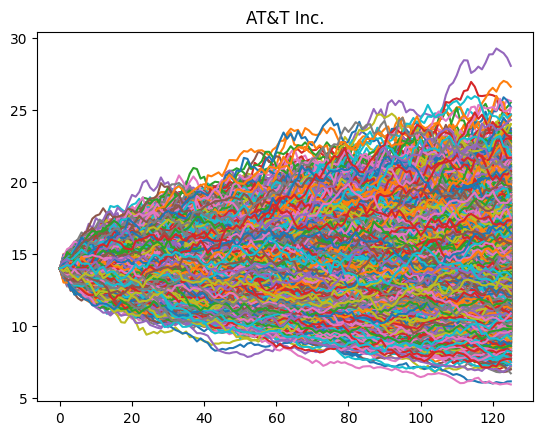

In [15]:
sample_pathh = np.array(stock_paths['AT&T Inc.'])
print(sample_pathh)
plt.figure()
for path in sample_pathh:
    plt.plot(path)
    plt.title("AT&T Inc.")
plt.show()

In [17]:
#Considering the risk-free rate to be as that of April 15's, Rf = 7.18 %
#Sharpe Ratio =         mean return - Rf
#               ___________________________________
#             standard deviation of stock's returns
annualized_rate = 0.0718
daily_risk_free_rate = (1 + annualized_rate)**(1/365) - 1
mean_daily_returns = {}
daily_volatilities = {}
sharpe_ratios = {}
for stock in stock_paths.keys():
    sample_pathh = np.array(stock_paths[stock])#Array of all paths for this stock

    mean_daily_returns[stock] = []
    daily_volatilities[stock] = []
    sharpe_ratios[stock] = []

    #Process each path
    for path in sample_pathh:
        #Calculate daily returns
        daily_returns = np.diff(path) / path[:-1]

        #Calculate mean daily return
        mean_return = np.mean(daily_returns)

        #Calculate daily volatility
        volatility = np.std(daily_returns)

        #Calculate Sharpe Ratio
        sharpe_ratio = (mean_return - daily_risk_free_rate) / volatility

        mean_daily_returns[stock].append(mean_return)
        daily_volatilities[stock].append(volatility)
        sharpe_ratios[stock].append(sharpe_ratio)
sharpe_ratios = pd.DataFrame(sharpe_ratios)

mean_sharperatio = {}
for stock in sharpe_ratios.keys():
  mean_sharperatio[stock] = sharpe_ratios[stock].mean()
mean_sharperatio = (pd.Series(mean_sharperatio)).tolist()
print(mean_sharperatio)

[0.020339312570538157, 0.0017811663907304869, -0.007921276307621208, 0.06085623256729517, -0.007584032872140677, 0.011918011874340287, -0.0006667059550656976, -0.014166829758703718, -0.030993888489153302, -0.01733444810047897, -0.019730488869964685, -0.07687398514049874, -0.0016873559947569313, 0.03275397499459297, 0.03350754080978107, 0.04831124947575288, -0.011867579099459565, -0.023540842720487346, -0.07290256506569663, -0.006101731747498206, -0.04670181547082298, 0.003374991607242983, -0.002422940384987938, 0.019448579262633058, -0.019523887201373446, 0.049517793091417524, 0.04213864096183771, -0.06321357639584499, 0.01827995637974761, 0.012295608482893197]


In [18]:
df = pd.read_excel('weights_stocks.xlsx', sheet_name='Sheet1', header=None)

weights = df.iloc[0].tolist()
print(weights)

[0.0330893611881946, 0.0436563211647101, 0.00112997063154504, 0.295381265253948, 0.000336070761894277, 7.71247164204006e-05, 0.00628509917935113, 4.07644563121017e-05, 0.000334353368377783, 3.4530183117241e-05, 0.000797442737955375, 0.00410691716410635, 0.0347124107746597, 0.120816550205985, 0.0668914931597803, 0.25262602630706, 0.0129448724281896, 0.000541157616950534, 3.4518246839867e-05, 4.94805724096097e-05, 0.00662358284670851, 0.00179059777105079, 0.00777185986954514, 0.10992822939489, -1.03194648722513e-16, -1.10346397383918e-16, 4.00912980200853e-17, -1.99358525937814e-16, -9.86378976421562e-17, -8.15179322587559e-17]


In [19]:
#taking care of floating point precision error
weights=[x if x >= 0 else 0 for x in weights]
print(weights)

[0.0330893611881946, 0.0436563211647101, 0.00112997063154504, 0.295381265253948, 0.000336070761894277, 7.71247164204006e-05, 0.00628509917935113, 4.07644563121017e-05, 0.000334353368377783, 3.4530183117241e-05, 0.000797442737955375, 0.00410691716410635, 0.0347124107746597, 0.120816550205985, 0.0668914931597803, 0.25262602630706, 0.0129448724281896, 0.000541157616950534, 3.4518246839867e-05, 4.94805724096097e-05, 0.00662358284670851, 0.00179059777105079, 0.00777185986954514, 0.10992822939489, 0, 0, 4.00912980200853e-17, 0, 0, 0]


In [20]:
stock_data_test = {}
for ticker in range(len(stock_tickers)):
    stock = yf.Ticker(stock_tickers[ticker])
    hist = stock.history(start = '2023-10-23', end = '2024-04-23')
    stock_data_test[stock_names[ticker]] = hist['Close']

prices_df_test = pd.DataFrame(stock_data_test)
print("Number of trading days: ", len(prices_df_test))
daily_returns = prices_df_test.pct_change()

weighted_returns = daily_returns.multiply(weights, axis='columns')

portfolio_daily_returns = weighted_returns.sum(axis=1)

total_portfolio_return = (portfolio_daily_returns + 1).prod() - 1

print("Daily Portfolio Returns:")
print(portfolio_daily_returns)
print("Total Portfolio Return over the Period:")
print(total_portfolio_return)


Number of trading days:  125
Daily Portfolio Returns:
Date
2023-10-23 00:00:00-04:00    0.000000
2023-10-24 00:00:00-04:00    0.000613
2023-10-25 00:00:00-04:00   -0.005049
2023-10-26 00:00:00-04:00   -0.008562
2023-10-27 00:00:00-04:00   -0.025176
                               ...   
2024-04-16 00:00:00-04:00   -0.001302
2024-04-17 00:00:00-04:00   -0.003129
2024-04-18 00:00:00-04:00   -0.003969
2024-04-19 00:00:00-04:00    0.001985
2024-04-22 00:00:00-04:00    0.006775
Length: 125, dtype: float64
Total Portfolio Return over the Period:
0.1740048627305515


So the portfolio achieved a return of 17.4% in a period of 6 months. This is an extra 14.81% return over the risk-free rate (5.18%/2 = 2.59%)